In [3]:
# from tsne import scatter
from utils import load_data
import pandas as pd
from tqdm import tqdm
from vectors import vectorize
import warnings

warnings.filterwarnings('ignore')
tqdm.pandas()

In [29]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE

# from sklearn.utils.extmath import _ravel
from numpy import ravel as _ravel

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

def scatter(x, colors, n):    
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", n))

    # We create a scatter plot.
    f = plt.figure(figsize=(16, 16))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=20,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(n):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [30]:
RS = 20200512

def render(x, y, n, perpl):
    proj = TSNE(random_state=RS, n_jobs=-1, perplexity=perpl).fit_transform(x)
    scatter(proj, y, n)  

In [20]:
N = 30

dataset = load_data('cleaned')
topN = dataset[dataset.target.isin(dataset.target.value_counts()[:N].index)]

In [21]:
x = topN.data.progress_apply(vectorize)

100%|██████████| 38143/38143 [01:16<00:00, 495.80it/s]


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target = le.fit_transform(topN.target)

In [23]:
df = pd.DataFrame({ 'data': x, 'target': target })

x = np.vstack([[v for v in df.data[df.target==i].values]
               for i in range(N)])
y = np.hstack([[v for v in df.target[df.target==i].values]
               for i in range(N)])

## PERPLEXITY 10

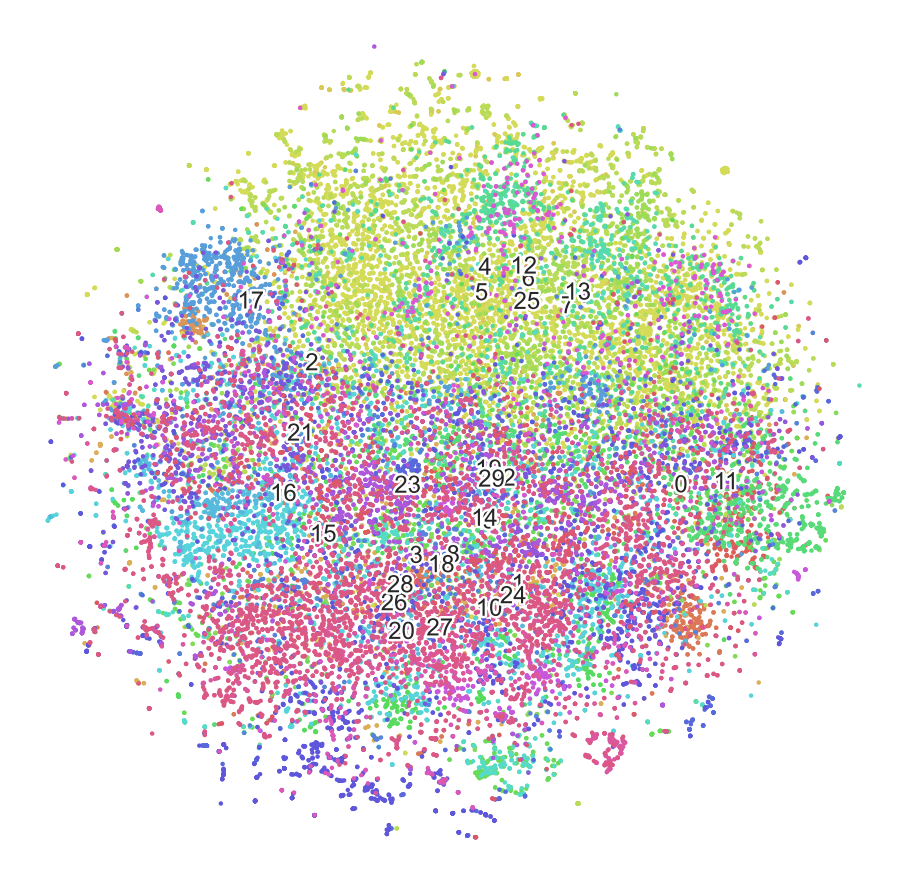

In [31]:
render(x,y,N,10)

In [38]:
le.inverse_transform([4,5,25,6,13,12])

array(['Відсутнє ХВП', 'Відсутність ГВП', 'Робота циркуляційної системи',
       'Відсутність опалення', 'Незадовільна температура опалення',
       'Незадовільна температура ГВП'], dtype=object)

In [42]:
le.inverse_transform([3, 8, 18])

array(['Відновлення благоустрою після вик. планових,аварійних робіт на об’єктах благоуст',
       'Відсутність освітлення на опорних стовпах за відсутності/несправності лампочок',
       'Питання освітлення на опорних стовпах'], dtype=object)

In [50]:
le.inverse_transform([14, 9, 22])

array(['Освітлення в приміщенні й при вході в нього',
       'Відсутність освітлення у під’їзді за відсутності/несправності лампочок',
       'Ремонт дахів'], dtype=object)

In [53]:
le.inverse_transform([26, 28, 20, 27])

array(['Стихійне сміттєзвалище',
       'Укладання та ремонт асфальтного покриття',
       'Прибирання та санітарний стан територій',
       'Технічний стан проїжджих частин вулиць та тротуарів'],
      dtype=object)

In [51]:
le.inverse_transform([10, 24, 1])

array(['ГЛ ”Несанкціонована торгівля”', 'Робота світлофора',
       'Будівництво/дооблаштування дитячого майданчику'], dtype=object)

In [49]:
le.inverse_transform([0, 11])

array(['Інші технічні недоліки стану ліфту',
       'Не працює пасажирський ліфт'], dtype=object)

😯 t-SNE досить чудово впорався із групуванням схожих категорій запитів. цю інфу можна було б викорститати для об'єднання категорій.

## PERPLEXITY 20

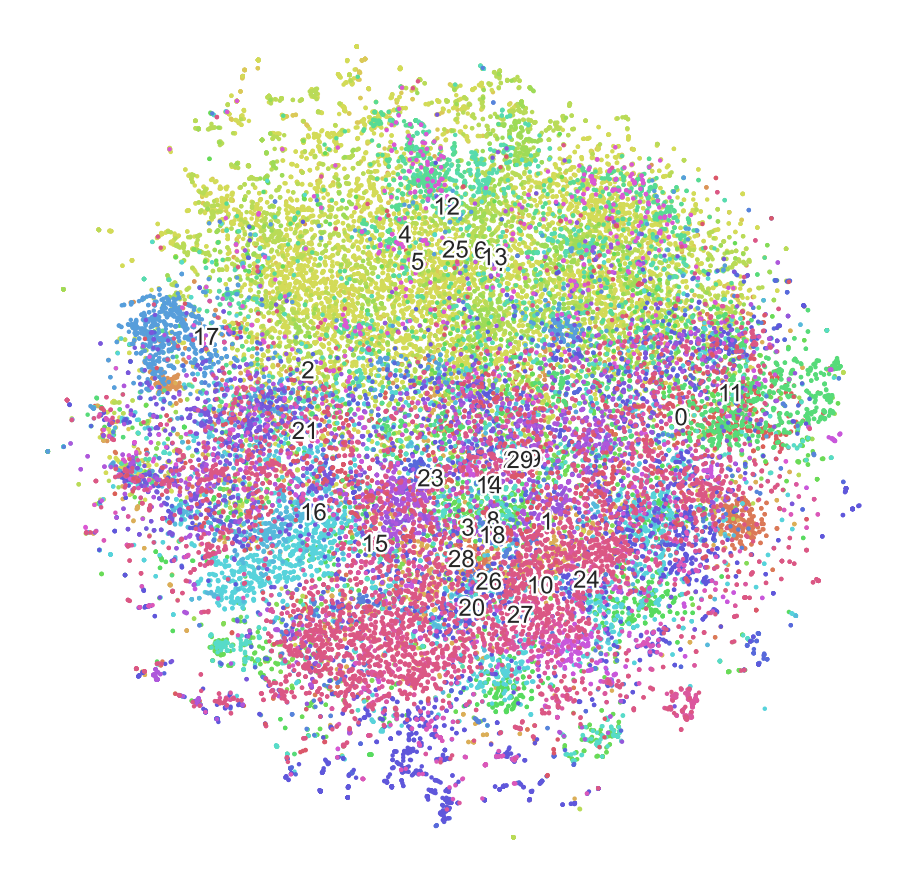

In [32]:
render(x,y,N,20)

## PERPLEXITY 30

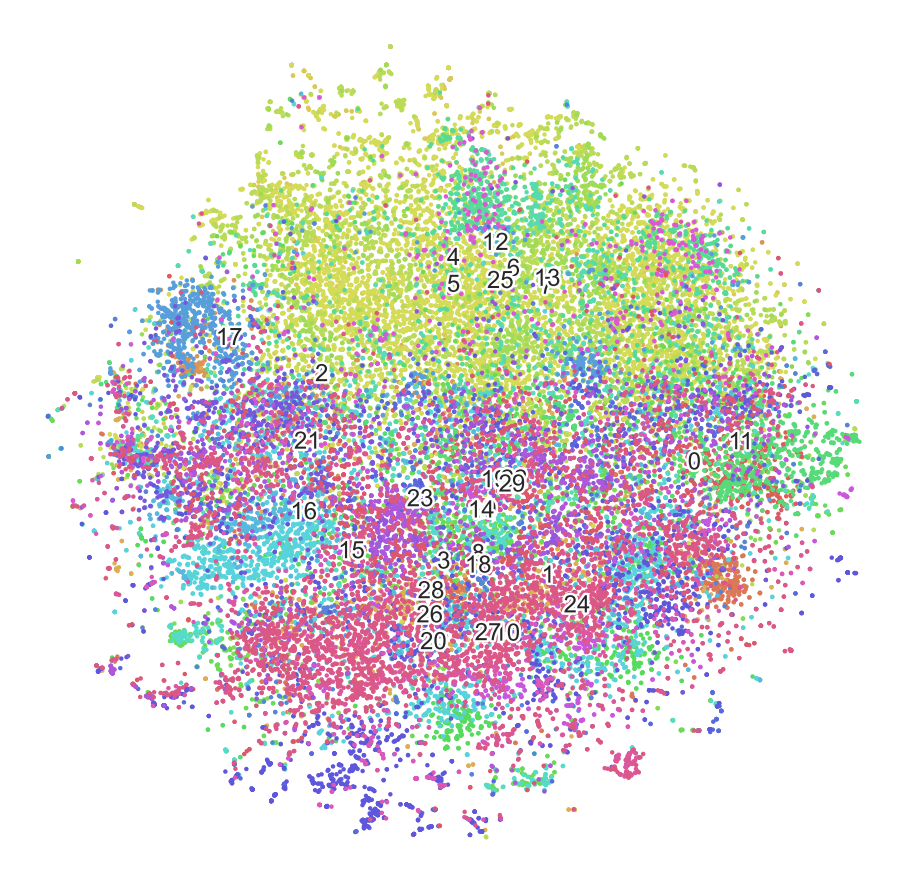

In [33]:
render(x,y,N,30)

## PERPLEXITY 50

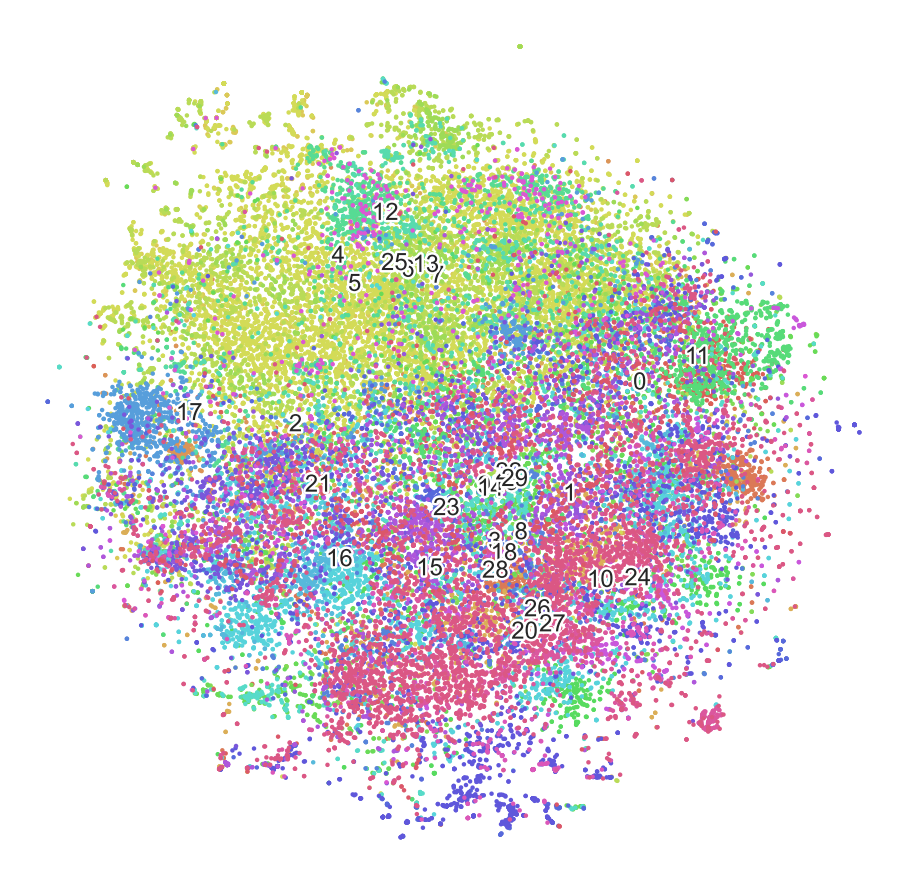

In [34]:
render(x,y,N,50)

## PERPLEXITY 100

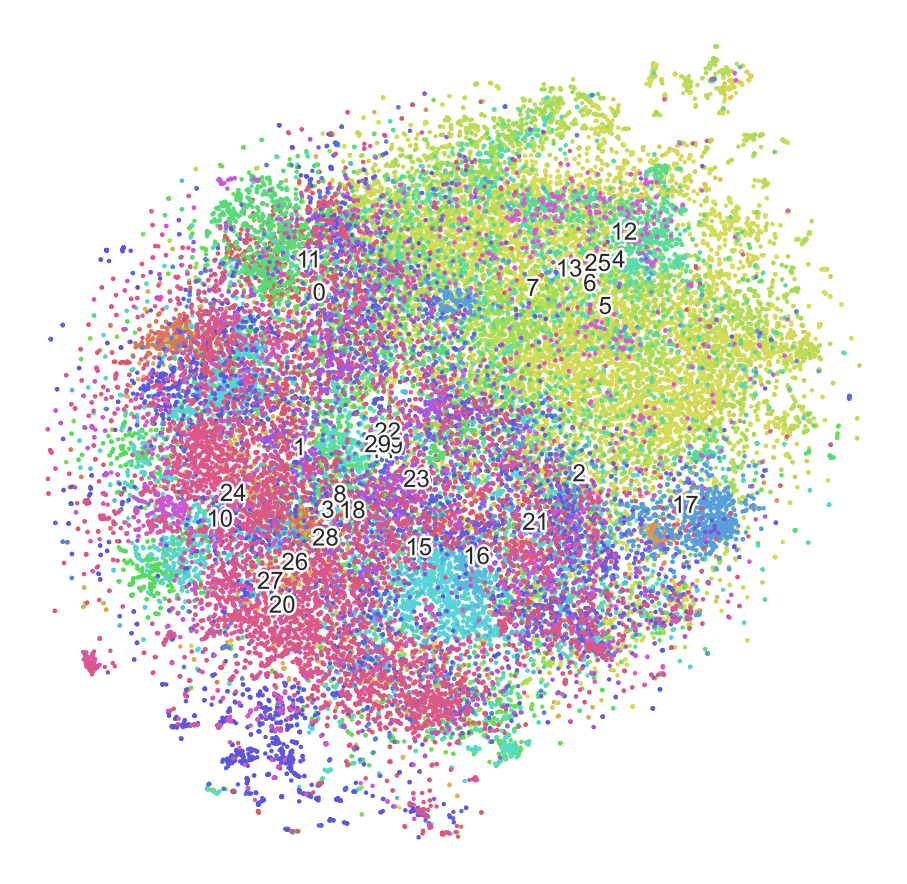

In [35]:
render(x,y,N,100)